<a href="https://colab.research.google.com/github/AmeeraWan/Analytics/blob/main/heart_disease_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction**

# Introduction

Key facts of Heart Disease By [WHO](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))

1. **Cardiovascular diseases** (CVDs) are the **leading cause of death globally**.
2. An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
3. Over three quarters of CVD deaths take place in low- and middle-income countries.
4. Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
5. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
6. **It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.**


Objectives:
1. Perform dataset exploration using various types of data visualization.
2. Build machine learning model that can predict patients status.
3. Export prediction result on test data into files.
4. Save/dump the complete machine learing pipeline for later usage.
5. Perform prediction on new example data given and export the prediction result.

# Installing & Importing Libraries


In [ ]:
# --- Installing Libraries ---
#!pip install ydata-profiling
!pip install pywaffle
!pip install highlight-text
!pip install Pillow
!pip install typing_extensions
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1
!pip install pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.4 M

In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib

from ydata_profiling import ProfileReport
from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette


/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


# Setting up Google Colab & importing datasets

Dataset: https://www.kaggle.com/datasets/data855/heart-disease

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np

In [ ]:
# Connecting to google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# downloading the training dataset into google colab from google drive
download = drive.CreateFile({'id': '1RSyq97q6oSS0WuCYGDgOTr0Vz4R_5wj8'})

# This is to unzip the downloaded file
download.GetContentFile('archive (6).zip')
!unzip 'archive (6).zip'


Archive:  archive (6).zip
  inflating: heart.csv               


In [ ]:
heart_disease = pd.read_csv('heart.csv')

In [ ]:
heart_disease.head().style.background_gradient(cmap='Reds').hide_index()

<ipython-input-10-c4e792cb4ef5>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  heart_disease.head().style.background_gradient(cmap='Reds').hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


# EDA

## Data Dictionary

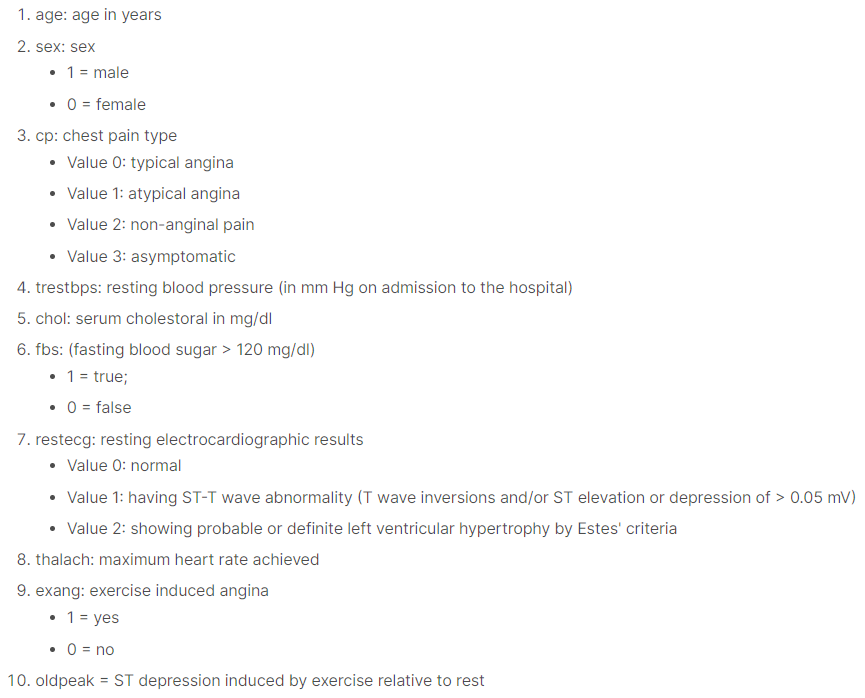

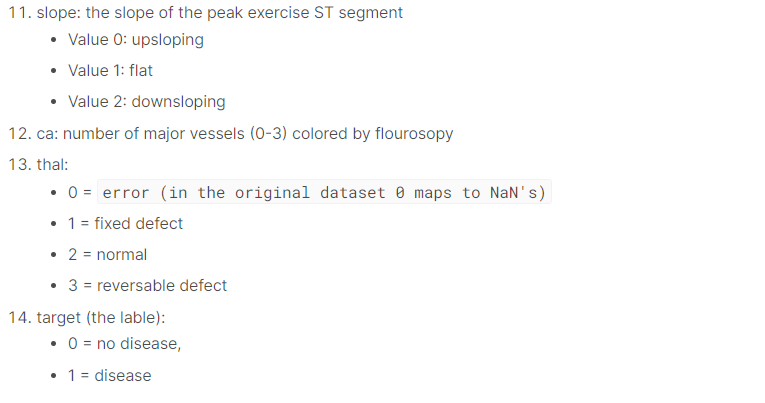

**Note on the target label:**

Diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

## Initial Data Exploration


In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Note:**
* From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us.
* It also seems that there is no null values found in each columns

**Notes from the discussion forum of the dataset:**

* data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
* data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.


**Action: Drop the faulty data! (7 data entry will be dropped)**

In [ ]:
# to further confirm that there are no null values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# ProfileReport(heart_disease, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FF5733'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [ ]:
heart_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Age**

* There are about 41 ages in this dataset
* non of them has null values
* the mean age in this dataset is 54
* the yougest age in this dataset is 29
* and the oldest age in this dataset is 77
* This sample size has not reach a normal distribution yet, could possibly used more datasets

**Sex**
* There are only two recorded genders in this dataset
* none of the has null values
* There is an imbalance in terms of the number of sexes. About 31% of the dataset is female and 69% of the dataset is male
* This could potentially lead to more biases in the dataset

**Chest Pain Type (CP)**
* There are 4 types of chest pain found in this dataset
* There are imbalances in the dataset interms of chest pain type
* there are more chest pain type 0 which is the typical angina, the least is type 3 which is asymptomatic
* none of the dataset has null values

**Resting Blood Pressure (trestbps)**

* The average blood pressure in this dataset is 131.6
* The minimum bp value a patient can have in this dataset is 94
* The highest bp value a patient can have in this dataset is 200
* none of the dataset has null values

**Cholesterol (chol)**
* The average cholesterol value in this dataset is 246.3
* The minimum cholesterol value a patient can have in this dataset is 126
* The highest cholesterol value a patient can have in this dataset is 564
* none of the dataset has null values

**Fasting Blood Sugar**
* 81% of this dataset has fbs of less than 120
* About 19 % of this dataset has fbs more than 120
* none of the dataset has null values

**Resting Electrocardiographic Results**
* none of the dataset has null values
* The amount of dataset for 0 (normal) and 1(abnormal ST-T wave) is about even
* The amount of dataset for 3 (asymptomatic) is very little

**Maximum Heart Rate**
* The mean maximum heart rate in this dataset is 149.64
* The minimum maximum heart rate that a person can get in this dataset is 71
* The highest maximum heart rate that a person can get in this dataset is 202
* none of the dataset has null values

**Exercise Induced Angina**
* There is higher percentage of people not having an exercise induced angina in this dataset (67.3%)
* There is a smaller percentage of people having an exercise induced angina in this dataset which is about (32.7%)
* none of the dataset has null values

**Old Peak**
* The average old peak value in this dataset is 1.04
* The minimum old peak value in this dataset is 0
* The maximum old peak value in this dataset is 6.2
* none of the dataset has null values

**Slope**
* There is an even amount of slope 1 (flat) and 2 (down sloping)
* There is small amount of slope 0 (unsloping)
* none of the dataset has null values

**Number of Major Vessel (CA)**
* The number of Major Vessel in the dataset decreased from 0 to 4
* none of the dataset has null values

**Thal**
* Type 2 (normal) is the highest in this dataset
* Type 0 (error) is the lowest in the dataset
* none of the dataset has null values

**Target Labels**
* The amount of the target label whether one has or does not have heart attach is almost equal
* none of the dataset has null values





## Preprocessing Dataset

1. Drop the following datasets:
* data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
* data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
2. Rename column names

3. Separate the dataset types:
* Separate the target variables from the dataset
* Then separate the remaining dataset into numerical and categorical dataset


*1. Dropping Datasets*

In [ ]:
# Datasets to be dropped
heart_disease.query('ca == 4 or thal == 0')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
# changed the thal datatype
heart_disease['thal'] = heart_disease['thal'].astype(int)

# Dropping datasets
heart_disease = heart_disease[(heart_disease.thal != 0) & (heart_disease.ca != 4)]

*2. Rename Columns*

* The feature names in the dataset are abbreviated and hard to understand their meaning.
* A full medical/technical name is hard enough to understand for most of us let alone their short form.
* So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
* We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)
* Note: I borrowed [Rob](https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model/notebook) Harrand's idea of re-naming the columns.

In [ ]:
# making a copy of the original dataset
heart_disease_rename = heart_disease.copy()

# this contains the dataset with the renamed columns
heart_disease_rename = heart_disease_rename.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

heart_disease_rename.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Here we are decoding all the categorical data to their actual meaning
heart_disease_rename['sex'][heart_disease_rename['sex'] == 0] = 'female'
heart_disease_rename['sex'][heart_disease_rename['sex'] == 1] = 'male'

heart_disease_rename['chest_pain_type'][heart_disease_rename['chest_pain_type'] == 0] = 'typical angina'
heart_disease_rename['chest_pain_type'][heart_disease_rename['chest_pain_type'] == 1] = 'atypical angina'
heart_disease_rename['chest_pain_type'][heart_disease_rename['chest_pain_type'] == 2] = 'non-anginal pain'
heart_disease_rename['chest_pain_type'][heart_disease_rename['chest_pain_type'] == 3] = 'asymptomatic'

heart_disease_rename['fasting_blood_sugar'][heart_disease_rename['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_disease_rename['fasting_blood_sugar'][heart_disease_rename['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_disease_rename['resting_electrocardiogram'][heart_disease_rename['resting_electrocardiogram'] == 0] = 'normal'
heart_disease_rename['resting_electrocardiogram'][heart_disease_rename['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
heart_disease_rename['resting_electrocardiogram'][heart_disease_rename['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

heart_disease_rename['exercise_induced_angina'][heart_disease_rename['exercise_induced_angina'] == 0] = 'no'
heart_disease_rename['exercise_induced_angina'][heart_disease_rename['exercise_induced_angina'] == 1] = 'yes'

heart_disease_rename['st_slope'][heart_disease_rename['st_slope'] == 0] = 'upsloping'
heart_disease_rename['st_slope'][heart_disease_rename['st_slope'] == 1] = 'flat'
heart_disease_rename['st_slope'][heart_disease_rename['st_slope'] == 2] = 'downsloping'

heart_disease_rename['thalassemia'][heart_disease_rename['thalassemia'] == 1] = 'fixed defect'
heart_disease_rename['thalassemia'][heart_disease_rename['thalassemia'] == 2] = 'normal'
heart_disease_rename['thalassemia'][heart_disease_rename['thalassemia'] == 3] = 'reversable defect'

heart_disease_rename.head()

<ipython-input-19-162ee23826d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_rename['sex'][heart_disease_rename['sex'] == 0] = 'female'
<ipython-input-19-162ee23826d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_rename['chest_pain_type'][heart_disease_rename['chest_pain_type'] == 0] = 'typical angina'
<ipython-input-19-162ee23826d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_ren

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [ ]:
# Convert the numerical column to a categorical column
heart_disease_rename['num_major_vessels'] = heart_disease_rename['num_major_vessels'].astype('object')

In [ ]:
# all the categorical data has been successfully changed to the object type
heart_disease_rename.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels             object
thalassemia                   object
target                         int64
dtype: object

3. Separate the Datatypes

In [ ]:
# compiling column names with numerical datatypes
numerical_feat = heart_disease_rename.select_dtypes(include=np.number).columns.tolist()
numerical_feat.remove('target')

# compiling column names with categorical datatypes inidcated by 'object'
categorical_feat = heart_disease_rename.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {numerical_feat}")
print(f"Categorical Features: {categorical_feat}")

Numerical Features: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
Categorical Features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']


## Exploring Features / Target

### Investigating Target Distribution

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
# Preprocessing the data into the desired format to input into the bar chart
count_by_target = heart_disease_rename['target'].value_counts().reset_index(name='count')
count_by_target = count_by_target.rename(columns={'index': 'target'}).sort_values(by='target').reset_index(drop=True)

# renaming the target names to make it more sensible
count_by_target['target'][count_by_target.target == 0] = 'no disease (0)'
count_by_target['target'][count_by_target.target == 1] = 'disease (1)'

# Calculate percentages
count_by_target['percentage'] = round((count_by_target['count'] / count_by_target['count'].sum()) * 100, 1)

count_by_target

,target,count,percentage
0,no disease (0),136,45.9
1,disease (1),160,54.1


In [ ]:
# Specify custom colors
colors = {0: '#FF5733', 1: '#0080ff'}

# Plotly Express bar chart
fig = px.bar(count_by_target, x='target', y='percentage', color='target',color_discrete_sequence=[colors[0], colors[1]], text=count_by_target['percentage'].apply(lambda x: f'{x:.2f}%'),
              labels={'percentage': 'Percentage', 'target': 'Target'})

fig.update_traces(textposition="outside")

# Show the plot
fig.show()


The target distribution is fairly balance. There is not a big gap between the amount of patient with no disease (45.9%) and patient with disease (54.1%) so therefore we do not need to worry about the target imbalance

### Investigating Categorical Data

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

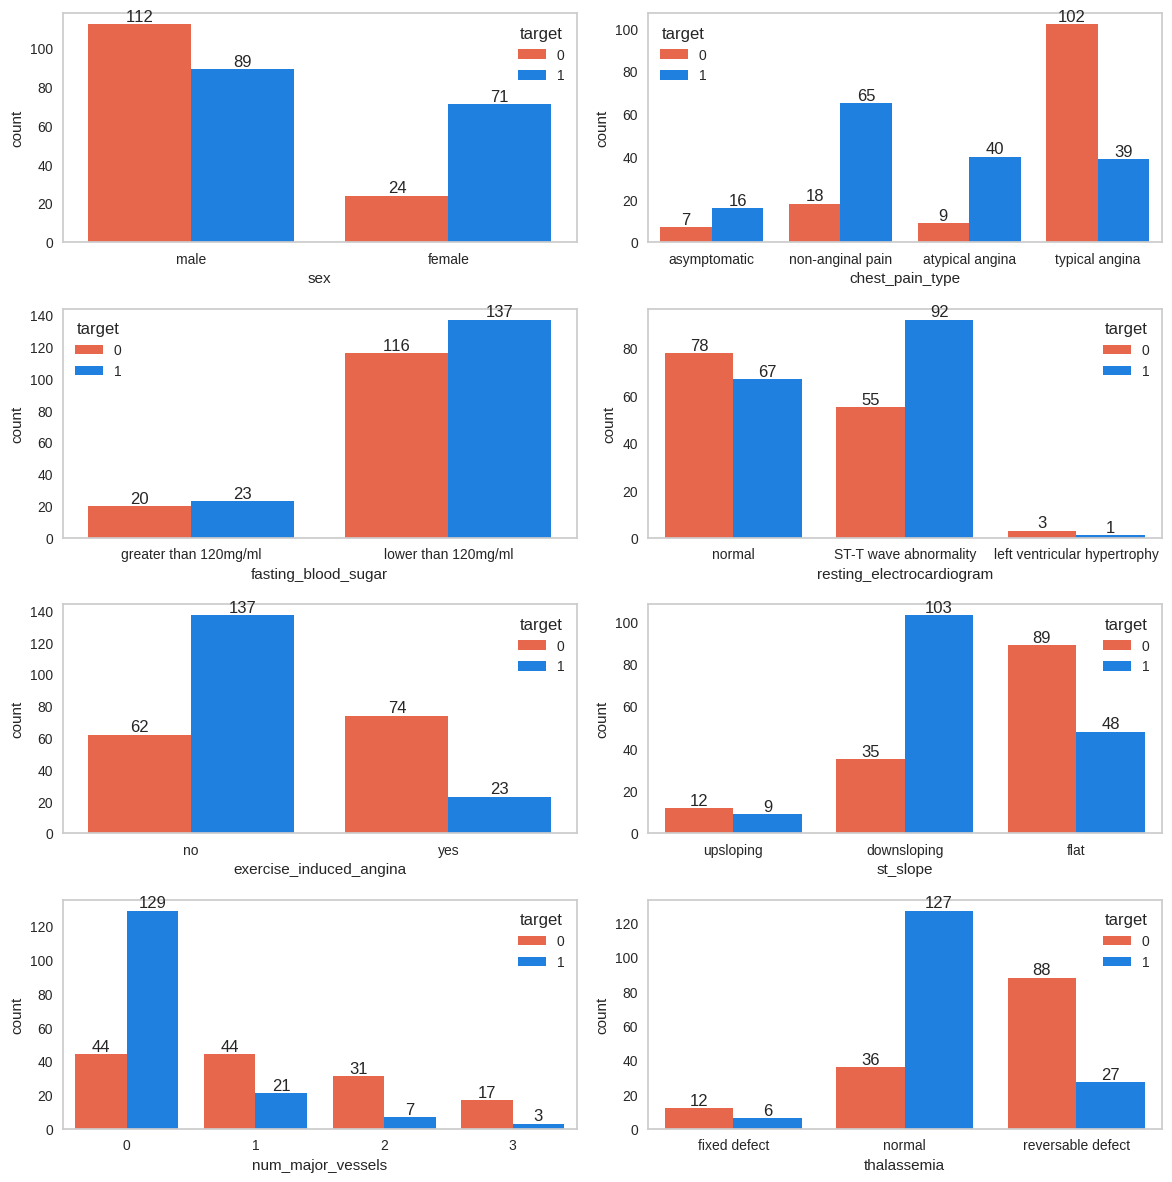

In [ ]:
# the following is much more efficient than the script abpve

import matplotlib.pyplot as plt
import seaborn as sns

# List of variables for countplots
#variables = ['sex', 'resting_electrocardiogram', 'chest_pain_type', 'fasting_blood_sugar', 'exercise_induced_angina', 'st_slope', 'thalassemia', 'num_major_vessels']
variables = categorical_feat

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))

# Iterate through variables and create countplots
for i, variable in enumerate(variables):
    row_index = i // 2  # Calculate the row index
    col_index = i % 2   # Calculate the column index

    # Plot countplot for the current variable
    sns.countplot(x=variable, hue='target', data=heart_disease_rename, ax=axes[row_index, col_index], palette=['#FF5733','#0080ff'])
    #axes[row_index, col_index].set_title(f'Countplot for {variable.capitalize()}')
    axes[row_index, col_index].grid(False, axis='both')  # Remove grid

    # Add count values on top of the bars
    for p in axes[row_index, col_index].patches:
        axes[row_index, col_index].text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.0f}'.format(p.get_height()), ha='center', va='bottom')

# Remove the empty subplot in the last row and second column
#fig.delaxes(axes[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Sex**
* The ratio of heart disease between female and male is almost the same

**Chest Pain Type**

* [Noncardiac chest pain](https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain) is defined as recurring pain in your chest — typically, behind your breast bone and near your heart — that’s not related to your heart. In most people, noncardiac chest pain is actually related to a problem with their esophagus, most often gastroesophageal reflux disease (GERD). Stress, anxiety and depression can also manifest as chronic chest pain.
* [Typical angina](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain) refers to the characteristic chest pain or discomfort that occurs when there is a temporary reduction in blood flow to the heart muscle. This reduction in blood flow is often due to the narrowing or blockage of coronary arteries, which supply oxygen and nutrients to the heart. Typical angina is a symptom of coronary artery disease (CAD).
* [Atypical angina](https://my.clevelandclinic.org/health/symptoms/24935-atypical-chest-pain) refers to chest pain or discomfort that deviates from the typical characteristics of angina. Unlike typical angina, which follows a well-defined pattern, atypical angina may have variations in terms of location, character, duration, triggers, and relief. This term is often used to describe chest pain that does not fit the classic presentation of angina but is still related to heart-related issues.

* It seems that people with **heart disease** has **higher occurrance of non-anginal pain** (65) then atypical angina (40) and then typical angina (39)
* It seems that people with **no heart disease** tend to have **higher occurrance of typical angina** (102)
* it is interesting that there is high amount of people without heart disease has high occurance of typical angina but does not have heart disease. Could it be that these patient may be at risk but has not developped it yet?

**Fasting Blood Sugar**
* The distribution of fasting blood sugar for both with and without heart disease is about the same.
* However majority of the dataset contains patients with fasting blood sugar lower than 120mg/ml

**Resting Electrocardiogram**
* For people with heart disease, it seems that they tend to have higher occurrance of st-t wave abnormality
* for those without heart disease, they tend to have higher occurance of normal resting electrocardiogram which is expected

**Exercise Induced Angina**
* It seems that people with heart disease tends to not have exercise induced angina
* whereas for individuals without heart disease they tend to have similar distribution of having and not having exercise induced angina

**ST-Slope**

The ST segment is a portion of the electrocardiogram (ECG or EKG) that represents the interval between the end of ventricular depolarization and the beginning of repolarization. Changes in the ST segment can provide important information about the heart's electrical activity and potential cardiac issues. The slope of the ST segment is one of the aspects considered in the interpretation of an ECG.

The ST segment can have different slopes, and these slopes are classified as upsloping, downsloping, or flat:

**Upsloping (or ascending) ST-Segment:**

* **Description:** The ST segment rises gradually from the J point (junction of the termination of the QRS complex and the beginning of the ST segment).
* **Clinical Significance:** Upsloping ST-segment changes are generally considered less specific for indicating myocardial ischemia or infarction compared to downsloping or horizontal changes. They may be seen in various conditions, including normal variants and non-cardiac causes.

**Downsloping (or descending) ST-Segment:**

* **Description:** The ST segment descends gradually from the J point.
* **Clinical Significance:** Downsloping ST-segment changes, particularly if they occur during stress testing, may raise suspicion of myocardial ischemia. However, the interpretation depends on the clinical context, and other factors, such as symptoms and additional ECG changes, are considered.


**Flat (or horizontal) ST-Segment:**

* **Description:** The ST segment remains relatively level without a clear upward or downward slope.
* **Clinical Significance:** A flat ST segment may be normal in some situations, but it can also be associated with certain cardiac conditions. The clinical context, the presence of symptoms, and other ECG changes are important in determining the significance of a flat ST segment.

**Result:**
* People with heart disease seems to have high number of downsloping of st-slope
* People without heart disease seems to have higher levels of flat ST-Slope

**Number of Major Vessel**
* There is higher number of heart disease patient with number of major vessel = 0 in comparison to people with heart disease
* whereas for people without heart disease it seems there is almost an equal distribution to have number of major vessel to be around 0,1 or 2

**Thalessemia**
* Based on these dataset most patients have a normal or reversable defect
* It seems that most patients who have thalessemia defect (reversable + fixed)are less likely to have a heart disease.
* Whereas, those with normal thalassemia are more likely to have a heart condition.



###Investigating Numerical Data

In [ ]:
import plotly.express as px

# Assuming numerical_feat is a list of numerical feature names
for col in numerical_feat:
    print(col)
    print('Skew Target 0:', round(heart_disease_rename[col][heart_disease_rename.target == 0].skew(), 2))
    print('Skew Target 1:', round(heart_disease_rename[col][heart_disease_rename.target == 1].skew(), 2))

    # Create a subplot with two vertical figures
    fig = px.histogram(
        heart_disease_rename,
        x=col,
        color="target",
        marginal="box",  # or violin, rug
        hover_data=heart_disease_rename.columns,
        facet_col="target",  # Use "facet_row" for horizontal subplots
        category_orders={"target": [0, 1]},  # Optional: control the order of facets
    )

    # Update layout
    fig.update_layout(height=400, width=800, title_text=f'Distribution of {col}')

    # Show the plot
    fig.show()


age
Skew Target 0: -0.58
Skew Target 1: 0.12


resting_blood_pressure
Skew Target 0: 0.84
Skew Target 1: 0.44


cholesterol
Skew Target 0: 0.3
Skew Target 1: 1.74


max_heart_rate_achieved
Skew Target 0: -0.28
Skew Target 1: -0.69


st_depression
Skew Target 0: 0.72
Skew Target 1: 1.61


**Age**

*Skew:*
1. **Skew Target 0: -0.58**

* A negative skewness of -0.58 implies that the age distribution for people without heart disease is skewed to the left
* The magnitude of -0.58 suggests a moderately strong left-skewness.
* Indicating that there may be more older individuals and fewer younger individuals.

2. **Skew Target 1: 0.12**

* A skewness of 0.12 suggests a near-normal distribution for the age of people with heart disease.
* In this case, it means that the ages are more evenly spread out, and there isn't a strong tendency towards either younger or older individuals.

**In practical terms:**

* Individuals with Target 0 (negative skew) tend to be older on average, with some outliers on the younger side.
* Individuals with Target 1 (positive skew) have no tendency towards younger ot older individuals

*Histogram*

1. **Target 0**
* The histogram depicts a negative skewness (-0.58), evident in the tail extending towards the left side.
* Notably, the data tends to cluster around older ages rather than younger ages, indicating a higher concentration of individuals in the older age groups.
* Examining the histogram for individuals without heart disease, a distinct peak emerges around the ages of 58 to 59. * This suggests that a considerable portion of the dataset for people without heart disease falls within this age range.

2. **Target 1**

* Consistent with the skewness value (0.12) mentioned earlier, the histogram for Target 1 closely resembles a normal distribution.
* The nearly symmetrical shape of the histogram indicates a relatively uniform spread of ages, with no significant skewness to the left or right. This suggests a more balanced distribution of ages among individuals with heart disease in the dataset.

*Box Plot:*

1. **Target 1**
* On average people with heart disease are between the ages 44.5 and 59.
* There are also people recorded with heart disease as young as 29 and as old as 76 in this dataset.


2. **Target 0**
* On average people without heart disease are between the ages 52.5 and 62.
* There are a few outliers which are the ages of 35, 38 and 77
* However, it is uncommon to find people without heart disease beyond 70

3. **Comparison**
* the average ages of those without heart disease are a bit higher than those with heart disease.

---------------------------------------------------------------

**Resting Blood Pressure**

*Skew*

1. **Skew Target 0: 0.84**

* With a positive skewness of 0.84, the resting blood pressure distribution for individuals without heart disease is noticeably skewed to the right.
* The magnitude of 0.84 indicates a substantial right-skewness, suggesting that the majority of individuals in this group may have lower resting blood pressure, and there might be fewer individuals with higher resting blood pressure.

2. **Skew Target 1: 0.44**

* Similarly, a positive skewness of 0.44 in the resting blood pressure distribution for individuals with heart disease indicates a right-skew.
* Although the skewness is not as strong (0.44 suggests a moderately strong right-skew), it still implies that there is a tendency for more individuals to have lower resting blood pressure, and there may be a relatively smaller proportion of individuals with higher resting blood pressure in comparison to those without heart disease.

**In practical terms:**

* For Target 0, it suggests that individuals with no heart disease tend to have lower resting blood pressure values with few individuals with high resting blood pressure
* For Target 1, the right-skewness is less pronounced, suggesting that individuals with heart disease also tend to have lower resting blood pressure, but the distribution is not as heavily skewed to the right as in Target 0.

*Histogram*

1. **Target 0**
* The histogram illustrates a positive skewness (0.84), noticeable in the rightward extension of the tail.
* Notably, the data concentrates around lower resting blood pressure for individuals without heart disease.
* The predominant peaks occur around resting blood pressure values of 120-124 and 130-134, indicating that a significant portion of this group has resting blood pressure within these ranges.

2. **Target 1**

* The histogram exhibits positive skewness (0.44), evident in the rightward extension of the tail, though not as pronounced as in Target 0.
* Remarkably, the data clusters around lower resting blood pressure for individuals with heart disease, with even fewer instances of higher resting blood pressure.
* The primary peaks for individuals with heart disease coincide with the ranges of 120-124 and 130-134, similar to those without heart disease. However, the peak is notably higher in individuals with heart disease, emphasizing a greater concentration of cases in these blood pressure ranges.

*Box Plot*

1. **Target 1**

* On average, individuals with heart disease in the dataset exhibit resting blood pressure readings ranging from 120 to 140.
* For individuals with heart disease, the lowest recorded resting blood pressure is 94, indicating that, in some cases, blood pressure can fall to this level.
* Conversely, the highest recorded resting blood pressure in this dataset is 172. It's important to note that such elevated values are relatively rare but are still observed occasionally.
* We've identified a few instances where individuals recorded blood pressure readings of 172, 178, and 180.

2. **Target 0**

* On average, individuals without heart disease in our dataset exhibit resting blood pressure readings ranging from 120 to 145. Interestingly, this range is quite similar to that of individuals with heart disease.
* The lowest recorded resting blood pressure for individuals without heart disease is 100, while the highest is around 180.
* There are two notable outliers in the dataset, with resting blood pressure values of 192 and 200. It's important to note that these extremely high values are not associated with heart disease, indicating that such cases exist outside the typical range.

3. **Comparison**
* Despite some variations, there isn't a significant difference in the distribution of resting blood pressure between individuals with and without heart disease. Both groups show a similar range, with occasional outliers.


----------------------------------------------------------------

**Cholesterol**

*Skew*

1. **Skew Target 0: 0.3**

* A skewness of 0.3 indicates a slight positive skew in the cholesterol distribution for people with heart disease.
* This suggests a distribution that is somewhat skewed to the right but not strongly so. The cholesterol levels appear to be more evenly spread out, with no strong tendency towards either lower or higher cholesterol.

2. **Skew Target 1: 1.74**

* The positive skewness of 1.74 in the cholesterol distribution for individuals without heart disease signifies a noticeable rightward skew.
* The magnitude of 1.74 implies a substantial right-skewness, indicating that the majority of individuals in this group may have lower cholesterol levels, and there might be fewer individuals with higher cholesterol levels.

**In practical terms:**

* For Target 1, it suggests that individuals with heart disease tend to have lower cholesterol levels with few individuals with high cholesterol
* Individuals without heart disease (Target 0) have no tendency towards low cholesterol or high cholesterol

*Histogram*

1. **Target 0:**

* A skewness of 0.3 suggests a distribution close to normal for cholesterol levels among individuals without heart disease.
* In this context, it indicates a relatively even spread of cholesterol levels, with no strong inclination towards either lower or higher values.

2. **Target 1:**

* The histogram illustrates a positive skewness (1.74) with a noticeable rightward tail, although not as pronounced as in Target 0.

* The magnitude of 1.74 indicates a substantial right-skewness, implying that a majority of individuals in this group likely have lower cholesterol levels, with fewer individuals exhibiting higher levels.

* The primary peak for individuals with heart disease occurs in the range of 220 to 239, similar to those without heart disease, but the peak is significantly higher in this group.

*BoxPlot*

1. **Target 1**

* On average, individuals with heart disease have cholesterol levels spanning from 208.5 to 268.5.
* The lowest recorded cholesterol level among individuals with heart disease is 126, indicating that in some cases, cholesterol levels can fall to this lower limit.
* On the other end of the spectrum, we observed elevated values, with the highest recorded cholesterol level reaching 354. It's important to note that such high values are relatively uncommon but have been observed on occasion.
* We identified a few instances where individuals exhibited extremely high cholesterol levels—360, 394, 417, and 564. These values are considered outliers, signifying rare occurrences of exceptionally elevated cholesterol.

2. **Target 0**
* On average, individuals with heart disease have cholesterol levels ranging from 217 to 283.5.
* Interestingly, this range is slightly higher than that of individuals without heart disease, suggesting a potential difference in cholesterol levels between the two groups.
* The lowest recorded cholesterol level among individuals with heart disease is 131.
* On the higher end, we observed elevated values, with the highest recorded cholesterol level reaching 353. This upper limit is not significantly different from those without heart disease.
* We identified a notable outlier where an individual exhibited an extremely high cholesterol level of 407 but did not have heart disease.

3. **Comparison**
* the average cholesterol levels of those without heart disease are a bit higher than those with heart disease.

---------------------------------------------------------------

**Max Heart Rate**

*Skew*

1. **Skew Target 0: -0.28**

* A negative skewness of -0.28 implies that the distribution of maximum heart rates for individuals without heart disease is slightly skewed to the left.
* However, the skewness is not very strong, indicating that it is very close to a normal distribution.
* In this case, it means that the maximum heart rates are more evenly spread out, with no strong tendency towards either high or low values.


2. **Skew Target 1: -0.69**

* A negative skewness of -0.69 implies that the distribution of maximum heart rates for individuals with heart disease is skewed to the left.
* The magnitude of -0.69 suggests a moderately strong left-skewness.
* This indicates that there may be more individuals with high maximum heart rates and fewer individuals with low maximum heart rates among those with heart disease.


**In practical terms:**

* Individuals with heart disease are more likely to have high maximum heart rates on average compared to individuals with Target 0.
* While both distributions are left-skewed, the skewness is more pronounced in people with heart disease.

*Histogram*

1. **Target 0:**
* The histogram portrays an almost normal distribution, as reflective of the skew score of -0.28.
* In this context, it suggests a relatively uniform spread of maximum heart rates, with no pronounced preference towards either lower or higher values.
* The predominant peaks for individuals without heart disease are observed in the range of 140 - 144.

2. **Target 1:**
* The histogram reveals a negative skewness (-0.69), evidenced by a tail extending towards the left side.
* Notably, the data tends to concentrate around higher levels of maximum heart rate rather than lower levels, signifying a heightened presence of individuals with elevated maximum heart rates.
* Upon closer examination of the histogram for individuals with heart disease, a distinctive peak emerges around the ages of 160 - 164, surpassing the corresponding peak in individuals without heart disease.


*BoxPlot*

1. **Target 1**
* On average, individuals with heart disease have maximum heart rates ranging from 149 to 172.
* The lowest recorded maximum heart rate among individuals with heart disease is 115, reflecting the lower end of the typical range.
* On the higher end, we observed elevated values, with the highest recorded maximum heart rate reaching 200. This upper limit indicates the presence of individuals with relatively high maximum heart rates.
* Notably, we identified a few outliers where individuals exhibited exceptionally low maximum heart rates—114, 111, 105, and 96. These values are considered unusual and uncommon but do occur in individuals with heart disease. It's important to note that such low maximum heart rates are exceptions rather than the norm.

2. **Target 0**
* On average, individuals without heart disease have maximum heart rates ranging from 125 to 156.5.
* The lowest recorded maximum heart rate among individuals without heart disease is 88, reflecting the lower end of the typical range.
* On the higher end, we observed elevated values, with the highest recorded maximum heart rate reaching 195. This upper limit is only slightly lower than the maximum heart rates observed in individuals with heart disease.
* Notably, we identified a single outlier where an individual exhibited a particularly low maximum heart rate of 71. This value is considered an exception, representing an uncommonly low maximum heart rate.

3. **Comparison**
* The upper fence, indicative of potential outliers, is not significantly different from that of individuals with heart disease.
* Interestingly, the average maximum heart rate for individuals without heart disease was found to be lower than that of individuals with heart disease which is expected

---------------------------------------------------------------

**ST-Depression**

*Skew*
1. **Skew Target 0: 0.72**

* With a positive skewness of 0.72, the st_depression distribution for individuals without heart disease is noticeably skewed to the right.
* The magnitude of 0.72 indicates a substantial right-skewness, suggesting that the majority of individuals in this group may have lower st_depression values, and there might be fewer individuals with higher st_depression.

2. **Skew Target 1: 1.61**

* With a positive skewness of 1.61, the st_depression distribution for individuals with heart disease is noticeably skewed to the right.
* The magnitude of 1.61 indicates a strong right-skewness, suggesting that the majority of individuals in this group may have lower st_depression values, and there might be fewer individuals with higher st_depression.
* Additionally, it implies that individuals in this group may have an even larger number of people with lower st_depression than those without heart disease.

**In Practical Terms:**
* For target 0, it suggest that individuals with no heart disease tend to have lower st_depression values with few individuals with high st_depression
* This also applies for target1, however because of the strong positive skew score, they may have higher amount of individuals with low st_depression in comparison to those in target 0

*Histogram*

1. **Target 0:**
* The histogram reveals a positive skewness (0.72), evident in the rightward extension of the tail.
* Notably, the data tends to cluster around individuals with lower st_depression values rather than higher st_depression for those without heart disease.

2. **Target 1:**
* The histogram also displays a positive skewness (1.61), noticeable in the rightward extension of the tail.
* Significantly, the data concentrates around individuals with lower st_depression, with very few instances of higher st_depression for those with heart disease.
* The primary peaks are observed around st_depression values of 0.2, indicating that a substantial portion of this group exhibits st depression within these ranges.

*BoxPlot*

1. **Target 1**
* On average, individuals with heart disease exhibit ST depression levels ranging from 0 to 1.1
* The lowest recorded ST depression among individuals with heart disease is 0, indicating that some individuals show no ST depression.
* On the higher end, we observed elevated values, with the highest recorded ST depression reaching 2.6.
* Notably, we identified a few outliers where individuals exhibited extremely high ST depression values of 3, 3.5, and 4.2. These values are considered outliers, indicating uncommonly high ST depression levels.

2. **Target 0**
* On average, individuals without heart disease exhibit ST depression levels ranging from 0.6 to 2.55.
* The lowest recorded ST depression among individuals without heart disease is 0, indicating that some individuals show no ST depression.
* On the higher end, we observed elevated values, with the highest recorded ST depression reaching 4.4.
* Notably, we identified a few outliers where individuals exhibited extremely high ST depression values of 5.6 and 6.2. These values are considered outliers, indicating uncommonly high ST depression levels.


3. **Comparison**
* Interestingly, the average ST depression for individuals without heart disease is higher than that of individuals with heart disease, suggesting a potential difference in ST depression levels between the two groups.

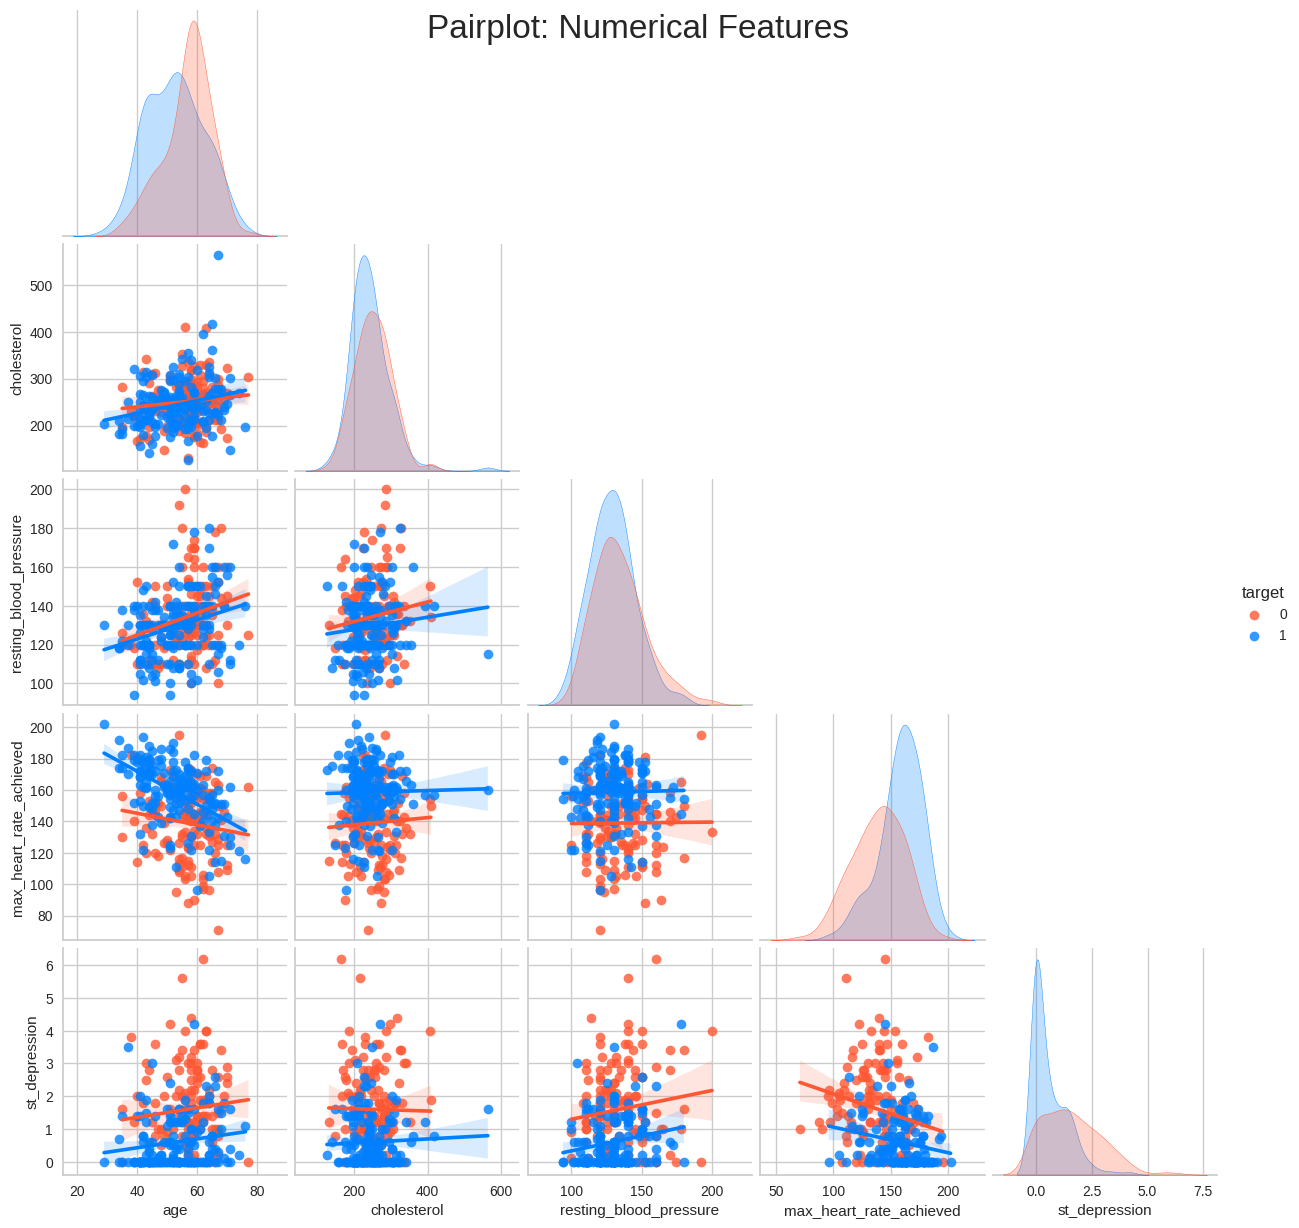

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = heart_disease_rename[_]
g = sns.pairplot(data_, hue="target", corner=True, kind='reg', palette=['#FF5733','#0080ff']);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Result:
* When looking at the correlation against age, we can see that all features are positively correlated with age except for maximum heart rate achieve
* For maximum heart rate you can see that the slope for patients with heart disease is steeper than those without disease
* this also suggest that people that are young, that has a really high maximum heart rate are very likely to get heart disease
* There is also a positive correlation between cholesterol and resting blood pressure. high blood pressure seems to have higher correlation to high cholesterol
* There is a negative correlation between maximum heart rate achieve with st depression. The higher the macimum heart rate achieved the lower the st depression achieved. Therefore lower st depression could also be an indication of heart disease

###Investigating all feature correlation with the target variable

Multi-Variate Analysis Using Heatmap

In [ ]:
import numpy as np
import plotly.express as px

# Assuming 'heart_disease_rename' is your DataFrame containing the data

# Calculate the correlation matrix
correlation_matrix = heart_disease.corr()

# Mask the upper triangular part of the matrix
mask = np.triu(np.ones_like(correlation_matrix), k=1)
masked_matrix = np.where(mask, np.nan, correlation_matrix)

# Create a lower triangular heatmap using Plotly Express
fig = px.imshow(
    masked_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    text_auto=True,
    aspect="auto"

)

# Update layout and show the plot
fig.update_layout(
    title='Numerical Variables Correlation Map',
    title_font=dict(size=24),
    xaxis_title='Features',
    yaxis_title='Features',
)

fig.show()


Results from the correlation map:

* From the correlation map we can see that **chest pain, maximum heart rate (thalach)** and **slope** has the **highest positive correlation** to the target variable
* we can also see that **exercise induced angina (exang), old peak**, **ca (Number of Major Vessel) and thalessemia negatively correlate** with the target variable

#Prediction

##Features Separating and Splitting

* The 'target' (dependent) column will be seperated from independent columns
* the dataset will be splitted into 80:20 ratio (80% training and 20% testing)


In [ ]:
# --- Seperating Dependent Features ---
x = heart_disease_rename.drop(['target'], axis=1)
#x['num_major_vessels'] = pd.to_numeric(x['num_major_vessels'], errors='coerce')
y = heart_disease_rename['target']

# --- Splitting Dataset ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


## Normalising Numerical and Categorical data

In [ ]:
# --- Numerical Pipeline ---
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# --- Combine Both Pipelines into Transformer ---
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, categorical_feat)
    , ('numerical', num_pipeline, numerical_feat)]
    , remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Apply to Dataframe ---
x_train_process = process_pipeline.fit_transform(x_train)
x_test_process = process_pipeline.fit_transform(x_test)
x_val_process = process_pipeline.fit_transform(x_val)
x_process = process_pipeline.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

## Model Implementation

## Setting Up Evaluation Metric

In [ ]:
!pip install shap
import sklearn.base
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

In [ ]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):

      clf.fit(x_train_process, y_train)
      pred = clf.predict(x_test_process)
      accuracy = accuracy_score(y_test, pred)

      pred_proba = clf.predict_proba(x_test_process)[:, 1]

      fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
      roc_auc = auc(fpr, tpr)

      # confusion matric, cm
      cm = confusion_matrix(y_test, pred)

      # recall: TP/(TP+FN)
      #recall = cm[1,1]/(cm[1,1] +cm[1,0])
      recall = recall_score(y_test, pred)

      # precision: TP/(TP+FP)
      #precision = cm[1,1]/(cm[1,1] +cm[0,1])
      precision = precision_score(y_test, pred)

      # F1 score: TP/(TP+FP)
      #f1 = 2*recall*precision/(recall + precision)
      f1 = f1_score(y_test, pred)

      df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
      data_table = data_table.append(df)

    return(np.round(data_table.reset_index(drop=True), 2))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(x_train_process, y_train)
        y_pred = clf.predict(x_test_process)
        cm = confusion_matrix(y_test, y_pred)

        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
        ax.figure.colorbar(im, ax=ax)

        classes = [0, 1]
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)

        for i in range(len(classes)):
            for j in range(len(classes)):
                text = ax.text(j, i, f'{cm[i, j]:.0f}', ha='center', va='center', color='black')

        ax.set_title(names[i])
        i += 1

    plt.tight_layout()
    plt.show()


In [ ]:
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves

    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(x_train_process, y_train)

        pred_proba = clf.predict_proba(x_test_process)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")


## Default Model Performance

In [ ]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# classifier algorithms with default parameters

seed = 42

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net",
    'Catboost',  #just added
    'xgbbost',   #just added
    'light GBM'  #just added
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
    CatBoostClassifier(random_state=seed, verbose=0), #just added
    XGBClassifier(objective= 'binary:logistic', random_state=seed), #just added
    LGBMClassifier(random_state=seed) #just added
]

Performance Metrics Summary Table

In [ ]:
score_summary(names, classifiers).sort_values(by='Recall' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

[LightGBM] [Info] Number of positive: 90, number of negative: 87
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508475 -> initscore=0.033902
[LightGBM] [Info] Start training from score 0.033902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
12,Catboost,86.440000,0.910000,0.860000,0.910000,0.890000
6,AdaBoost,81.360000,0.920000,0.810000,0.880000,0.840000
8,Naive Bayes,83.050000,0.920000,0.810000,0.910000,0.850000
11,Neural Net,84.750000,0.940000,0.810000,0.940000,0.870000
13,xgbbost,83.050000,0.920000,0.810000,0.910000,0.850000
0,Logistic Regression,84.750000,0.930000,0.780000,0.970000,0.860000
7,Gradient Boosting,81.360000,0.890000,0.780000,0.900000,0.840000
14,light GBM,81.360000,0.900000,0.780000,0.900000,0.840000
2,Support Vectors,83.050000,0.920000,0.750000,0.960000,0.840000
3,Nu SVC,83.050000,0.920000,0.750000,0.960000,0.840000


ROC Curve

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[LightGBM] [Info] Number of positive: 90, number of negative: 87
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508475 -> initscore=0.033902
[LightGBM] [Info] Start training from score 0.033902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

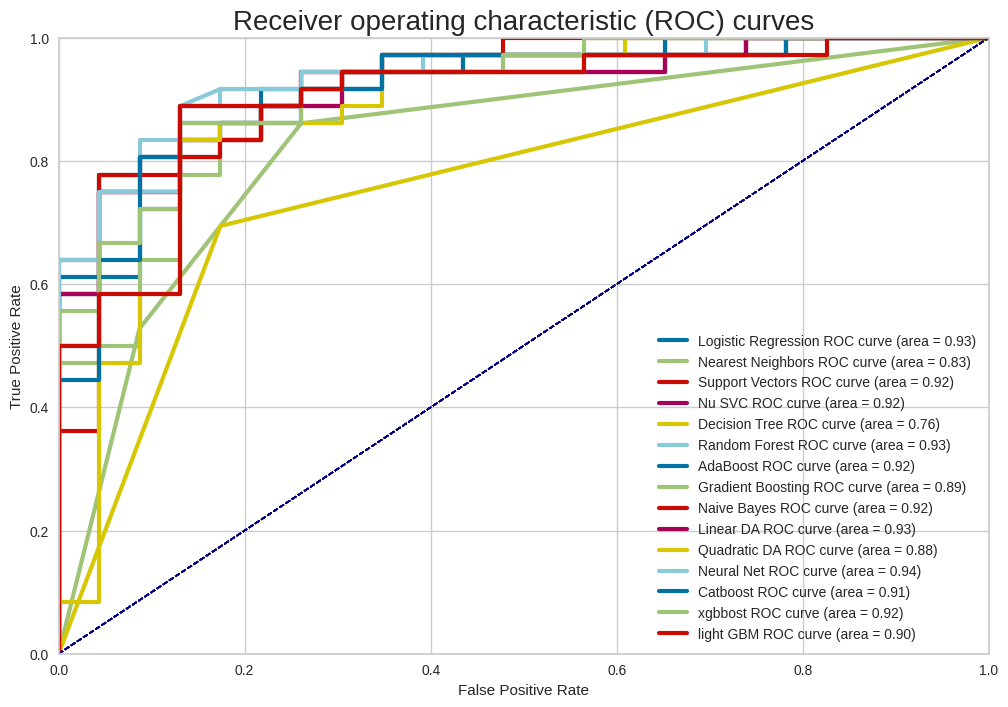

In [ ]:
roc_auc_curve(names, classifiers)

Conclusion:

* Based on precision Logistic regression ranks first (97%)
* For recall it is adaboost, naive bayes, neural net (81%)
* neural net ranks 1st in F1 (87%)

So which one to choose? The F1-score can give us a balance between recall and precision.

* So we will choose neural net as our best classifier at default

Conclusion:

* Based on precision Naive Bayes ranks first (90%)
* For recall it is Gradient Boosting and Linear DA (88%)
* Linear DA ranks 1st in F1 (88%)

So which one to choose? The F1-score can give us a balance between recall and precision.

* So we will choose Linear DA as our best classifier

**Note:** If I were consulting a clinic doing a heart disease screening test, I would like to strike a perfect balance between precision and recall (I don't want the clinic to risk their reputation of by handing out too many false positive result but all without risking their clients' health by predicting too many false negatives). Therefore, I would advice them to choose the model which gives a higher F1-score, i.e the Logistic regression model

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(x_train_process, y_train)
        y_pred = clf.predict(x_test_process)
        cm = confusion_matrix(y_test, y_pred)

        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)

        classes = [0, 1]
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)

        for i in range(len(classes)):
            for j in range(len(classes)):
                text = ax.text(j, i, f'{cm[i, j]:.0f}', ha='center', va='center', color='black')

        ax.set_title(names[i])
        i += 1

    plt.tight_layout()
    plt.show()


## Hyperparameter Tuning

###*Logistic Regression*

Default Model

In [ ]:
# Instantiate the classifier
lr_def_model = LogisticRegression(solver="liblinear", random_state=seed)

# Train model
lr_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
lr_def_model_y_pred = lr_def_model.predict(x_test_process)

Tuned Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# Instantiate the classifier
lr_model = LogisticRegression(random_state=seed)

# Set the parameters for grid search
param_grid = {
    'penalty': ['l2','none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 250, 500, 1000]
}

# Run the grid search
grid_obj = GridSearchCV(lr_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_lr_model = grid_obj.fit(x_train_process, y_train)

# Set the lr_model to the best combination of parameters
lr_model = best_lr_model.best_estimator_


# Train the model using the training sets
lr_model.fit(x_train_process, y_train)

# Prediction on the validation set
lr_model_y_pred = lr_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, lr_model_y_pred)
print(report)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.97      0.78      0.86        36

    accuracy                           0.85        59
   macro avg       0.85      0.87      0.85        59
weighted avg       0.88      0.85      0.85        59




240 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is not supported for the liblinear solver")
ValueError: penalty='none' is not supported for the libl

In [ ]:
lr_model

LogisticRegression(C=1.623776739188721, random_state=42, solver='newton-cg')

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "lr_def_model"
accuracy = accuracy_score(y_test, lr_def_model_y_pred)
recall = recall_score(y_test, lr_def_model_y_pred)
precision = precision_score(y_test, lr_def_model_y_pred)
f1 = f1_score(y_test, lr_def_model_y_pred)

lr_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "lr_tuned_model"
accuracy = accuracy_score(y_test, lr_model_y_pred)
recall = recall_score(y_test, lr_model_y_pred)
precision = precision_score(y_test, lr_model_y_pred)
f1 = f1_score(y_test, lr_model_y_pred)

lr_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

lr_data_table = pd.concat([lr_def_data_table, lr_tuned_data_table], axis=0)
lr_data_table = np.round(lr_data_table.reset_index(drop=True), 2)

lr_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,lr_def_model,84.750000,0.780000,0.970000,0.860000
1,lr_tuned_model,84.750000,0.780000,0.970000,0.860000


Results:
* we can see that after the model has been tuned there is no improvements in the score. Therefore we shall stick to the default model

###Naive Bayes

For Naive Bayes models, especially Gaussian Naive Bayes, hyperparameter tuning is less common compared to some other models like Support Vector Machines or Random Forests. This is because Naive Bayes models typically have fewer hyperparameters, and they are less sensitive to their values.

Default

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Instantiate the classifier
naive_def_model = GaussianNB()

# Train model
naive_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
naive_def_model_y_pred = naive_def_model.predict(x_test_process)

Tuned

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Instantiate the classifier
naive_model = GaussianNB()

# Set the parameters for grid search
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Run the grid search
grid_obj = GridSearchCV(naive_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_naive_model = grid_obj.fit(x_train_process, y_train)

# Set the naive_model to the best combination of parameters
naive_model = best_naive_model.best_estimator_


# Train the model using the training sets
naive_model.fit(x_train_process, y_train)

# Prediction on the validation set
naive_model_y_pred = naive_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, naive_model_y_pred)
print(report)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.97      0.83      0.90        36

    accuracy                           0.88        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.90      0.88      0.88        59



In [ ]:
naive_model

GaussianNB(var_smoothing=0.1873817422860384)

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "naive_def_model"
accuracy = accuracy_score(y_test, naive_def_model_y_pred)
recall = recall_score(y_test, naive_def_model_y_pred)
precision = precision_score(y_test, naive_def_model_y_pred)
f1 = f1_score(y_test, naive_def_model_y_pred)

naive_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "naive_tuned_model"
accuracy = accuracy_score(y_test, lr_model_y_pred)
recall = recall_score(y_test, lr_model_y_pred)
precision = precision_score(y_test, lr_model_y_pred)
f1 = f1_score(y_test, lr_model_y_pred)

naive_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

naive_data_table = pd.concat([naive_def_data_table, naive_tuned_data_table], axis=0)
naive_data_table = np.round(naive_data_table.reset_index(drop=True), 2)

naive_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
1,naive_tuned_model,84.750000,0.780000,0.970000,0.860000
0,naive_def_model,83.050000,0.810000,0.910000,0.850000


Results:

* we can see that after the model has been tuned that the accuracy, precision and F1 has improved slightly and the recall has been compromised slightly.
* Therefore we can go with the tuned model

###Neural Network

Default

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Instantiate the classifier
neural_net_def_model = MLPClassifier(random_state=seed)

# Train model
neural_net_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
neural_net_def_model_y_pred = neural_net_def_model.predict(x_test_process)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Tuned

In [ ]:
# Instantiate the classifier
neural_net_model = MLPClassifier(random_state=seed)

# Set the parameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}


# Run the grid search
grid_obj = GridSearchCV(neural_net_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_neural_net_model = grid_obj.fit(x_train_process, y_train)

# Set the neural_net_model to the best combination of parameters
neural_net_model = best_neural_net_model.best_estimator_


# Train the model using the training sets
neural_net_model.fit(x_train_process, y_train)

# Prediction on the validation set
neural_net_y_pred = neural_net_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, neural_net_y_pred)
print(report)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.94      0.81      0.87        36

    accuracy                           0.85        59
   macro avg       0.84      0.86      0.84        59
weighted avg       0.86      0.85      0.85        59



Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
best_neural_net_model.best_estimator_

MLPClassifier(random_state=42)

Result

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "neural_net_def_model"
accuracy = accuracy_score(y_test, neural_net_def_model_y_pred)
recall = recall_score(y_test, neural_net_def_model_y_pred)
precision = precision_score(y_test, neural_net_def_model_y_pred)
f1 = f1_score(y_test, neural_net_def_model_y_pred)

neural_net_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "neural_net_tuned_model"
accuracy = accuracy_score(y_test, neural_net_def_model_y_pred)
recall = recall_score(y_test, neural_net_def_model_y_pred)
precision = precision_score(y_test, neural_net_def_model_y_pred)
f1 = f1_score(y_test, neural_net_def_model_y_pred)

neural_net_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

neural_net_data_table = pd.concat([neural_net_def_data_table, neural_net_tuned_data_table], axis=0)
neural_net_data_table = np.round(neural_net_data_table.reset_index(drop=True), 2)

neural_net_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,neural_net_def_model,84.750000,0.810000,0.940000,0.870000
1,neural_net_tuned_model,84.750000,0.810000,0.940000,0.870000


Result:
* There is no difference in the score for the tuned model and the default model therefore we shall stick with the default model

###AdaBoost

Default

In [ ]:
# Instantiate the classifier
ada_def_model = AdaBoostClassifier(random_state=seed)

# Train model
ada_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
ada_def_model_y_pred = ada_def_model.predict(x_test_process)

Tuned

In [ ]:
# Instantiate the classifier
adaboost_model = AdaBoostClassifier(random_state=seed)

# Set the parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

# Run the grid search
grid_obj = GridSearchCV(adaboost_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_adaboost_model = grid_obj.fit(x_train_process, y_train)

# Set the adaboost_model to the best combination of parameters
adaboost_model = best_adaboost_model.best_estimator_


# Train the model using the training sets
adaboost_model.fit(x_train_process, y_train)

# Prediction on the validation set
adaboost_y_pred = adaboost_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, adaboost_y_pred)
print(report)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.90      0.78      0.84        36

    accuracy                           0.81        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.83      0.81      0.82        59



In [ ]:
best_adaboost_model.best_estimator_

AdaBoostClassifier(algorithm='SAMME', random_state=42)

Result

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "adaboost_def_model"
accuracy = accuracy_score(y_test, ada_def_model_y_pred)
recall = recall_score(y_test, ada_def_model_y_pred)
precision = precision_score(y_test, ada_def_model_y_pred)
f1 = f1_score(y_test, ada_def_model_y_pred)

adaboost_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "adaboost_tuned_model"
accuracy = accuracy_score(y_test, adaboost_y_pred)
recall = recall_score(y_test, adaboost_y_pred)
precision = precision_score(y_test, adaboost_y_pred)
f1 = f1_score(y_test, adaboost_y_pred)

adaboost_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

adaboost_data_table = pd.concat([adaboost_def_data_table, adaboost_tuned_data_table], axis=0)
adaboost_data_table = np.round(adaboost_data_table.reset_index(drop=True), 2)

adaboost_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,adaboost_def_model,81.360000,0.810000,0.880000,0.840000
1,adaboost_tuned_model,81.360000,0.780000,0.900000,0.840000


Results:
* the tuned model improved accuracy but compromised on the recall therefore the default model performs better since there is a good balance between the recall and precision

###Catboost

Default

In [ ]:
# Instantiate the classifier
catboost_def_model = CatBoostClassifier(random_state=seed, verbose=0)

# Train model
catboost_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
catboost_def_model_y_pred = catboost_def_model.predict(x_test_process)

Tuned

In [ ]:
# Instantiate the classifier
catboost_model = CatBoostClassifier(random_state=seed, verbose=0)

# Set the parameters for grid search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'border_count': [32, 64, 128],
}

# Run the grid search
grid_obj = GridSearchCV(catboost_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_catboost_model = grid_obj.fit(x_train_process, y_train)

# Set the catboost_model to the best combination of parameters
catboost_model = best_catboost_model.best_estimator_


# Train the model using the training sets
catboost_model.fit(x_train_process, y_train)

# Prediction on the validation set
catboost_model_y_pred = catboost_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, catboost_model_y_pred)
print(report)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.90      0.78      0.84        36

    accuracy                           0.81        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.83      0.81      0.82        59



In [ ]:
print(catboost_model)

Result

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "catboost_def_model"
accuracy = accuracy_score(y_test, catboost_def_model_y_pred)
recall = recall_score(y_test, catboost_def_model_y_pred)
precision = precision_score(y_test, catboost_def_model_y_pred)
f1 = f1_score(y_test, catboost_def_model_y_pred)

catboost_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "catboost_tuned_model"
accuracy = accuracy_score(y_test, adaboost_y_pred)
recall = recall_score(y_test, adaboost_y_pred)
precision = precision_score(y_test, adaboost_y_pred)
f1 = f1_score(y_test, adaboost_y_pred)

catboost_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

catboost_data_table = pd.concat([catboost_def_data_table, catboost_tuned_data_table], axis=0)
catboost_data_table = np.round(catboost_data_table.reset_index(drop=True), 2)

catboost_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,catboost_def_model,86.440000,0.860000,0.910000,0.890000
1,catboost_tuned_model,81.360000,0.780000,0.900000,0.840000


Result:
* here the tuned model performance decreased incomparison to the default model so we shall stick with the default model.

###XGBboost

Default

In [ ]:
# Instantiate the classifier
xgbboost_def_model = XGBClassifier(objective= 'binary:logistic', random_state=seed)

# Train model
xgbboost_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
xgbboost_def_model_y_pred = xgbboost_def_model.predict(x_test_process)

Tuned

In [ ]:
# Instantiate the classifier
xgb_model = XGBClassifier(objective= 'binary:logistic', random_state=seed)

# Set the parameters for grid search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'border_count': [32, 64, 128],
}

# Run the grid search
grid_obj = GridSearchCV(xgb_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_xgb_model = grid_obj.fit(x_train_process, y_train)

# Set the xgb_model to the best combination of parameters
xgb_model = best_xgb_model.best_estimator_


# Train the model using the training sets
xgb_model.fit(x_train_process, y_train)

# Prediction on the validation set
xgb_model_y_pred = xgb_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, xgb_model_y_pred)
print(report)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.90      0.75      0.82        36

    accuracy                           0.80        59
   macro avg       0.79      0.81      0.79        59
weighted avg       0.82      0.80      0.80        59



[10:05:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "loss_function" } are not used.



In [ ]:
best_xgb_model.best_estimator_

XGBClassifier(base_score=None, booster=None, border_count=32, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, depth=4, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, iterations=100, l2_leaf_reg=1,
              learning_rate=0.05, loss_function='Logloss', max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None, ...)

Result

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "xgb_def_model"
accuracy = accuracy_score(y_test, xgbboost_def_model_y_pred)
recall = recall_score(y_test, xgbboost_def_model_y_pred)
precision = precision_score(y_test, xgbboost_def_model_y_pred)
f1 = f1_score(y_test, xgbboost_def_model_y_pred)

xgb_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "xgb_tuned_model"
accuracy = accuracy_score(y_test, xgbboost_def_model_y_pred)
recall = recall_score(y_test, xgbboost_def_model_y_pred)
precision = precision_score(y_test, xgbboost_def_model_y_pred)
f1 = f1_score(y_test, xgbboost_def_model_y_pred)

xgb_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

xgb_data_table = pd.concat([xgb_def_data_table, xgb_tuned_data_table], axis=0)
xgb_data_table = np.round(xgb_data_table.reset_index(drop=True), 2)

xgb_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,xgb_def_model,83.050000,0.810000,0.910000,0.850000
1,xgb_tuned_model,83.050000,0.810000,0.910000,0.850000


Result:
* The scores remains the same even after hyperparameter tuning therefore we shall stick with the default model here

###LGBM

Default

In [ ]:
# Instantiate the classifier
lgbm_def_model = LGBMClassifier(random_state=seed)

# Train model
lgbm_def_model.fit(x_train_process, y_train)

# use the trained model to do prediction
lgbm_def_model_y_pred = lgbm_def_model.predict(x_test_process)

#Results
print(f1_score(y_test, lgbm_def_model_y_pred))
print(precision_score(y_test, lgbm_def_model_y_pred))
print(recall_score(y_test, lgbm_def_model_y_pred))

[LightGBM] [Info] Number of positive: 90, number of negative: 87
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508475 -> initscore=0.033902
[LightGBM] [Info] Start training from score 0.033902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Tuned

In [ ]:
# Instantiate the classifier
lgbm_model = LGBMClassifier(random_state=seed)

# Set the parameters for grid search
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],  # Gradient boosting type
    'num_leaves': [20, 31, 40],  # Maximum number of leaves in one tree
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'subsample_for_bin': [20000, 30000, 40000],  # Number of samples for constructing bins
    'min_child_samples': [20, 30, 50],  # Minimum number of data needed in a child
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Run the grid search
grid_obj = GridSearchCV(lgbm_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_lgbm_model = grid_obj.fit(x_train_process, y_train)

# Set the lgbm_model to the best combination of parameters
lgbm_model = best_lgbm_model.best_estimator_


# Train the model using the training sets
lgbm_model.fit(x_train_process, y_train)

# Prediction on the validation set
lgbm_model_y_pred = lgbm_model.predict(x_test_process)

# Calculate and print the classification report
report = classification_report(y_test, lgbm_model_y_pred)
print(report)

Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[LightGBM] [Info] Number of positive: 90, number of negative: 87
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508475 -> initscore=0.033902
[LightGBM] [Info] Start training from score 0.033902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [ ]:
best_lgbm_model.best_estimator_

LGBMClassifier(boosting_type='dart', colsample_bytree=0.8, learning_rate=0.2,
               num_leaves=20, random_state=42, reg_alpha=0, reg_lambda=0.1,
               subsample_for_bin=20000)

Result

In [ ]:
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

name = "lgbm_def_model"
accuracy = accuracy_score(y_test, lgbm_def_model_y_pred)
recall = recall_score(y_test, lgbm_def_model_y_pred)
precision = precision_score(y_test, lgbm_def_model_y_pred)
f1 = f1_score(y_test, lgbm_def_model_y_pred)

lgbm_def_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

name = "lgbm_tuned_model"
accuracy = accuracy_score(y_test, lgbm_def_model_y_pred)
recall = recall_score(y_test, lgbm_def_model_y_pred)
precision = precision_score(y_test, lgbm_def_model_y_pred)
f1 = f1_score(y_test, lgbm_def_model_y_pred)

lgbm_tuned_data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

lgbm_data_table = pd.concat([lgbm_def_data_table, lgbm_tuned_data_table], axis=0)
lgbm_data_table = np.round(lgbm_data_table.reset_index(drop=True), 2)

lgbm_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
0,lgbm_def_model,81.360000,0.780000,0.900000,0.840000
1,lgbm_tuned_model,81.360000,0.780000,0.900000,0.840000


Result:
* There is no difference in the score between the default model and the tuned model therefore we shall stick with the default model

# Test Models

###Initial Testing with Test Dataset

In [ ]:
models_data_table = pd.concat([lr_def_data_table,
                               naive_tuned_data_table,
                               neural_net_def_data_table,
                               adaboost_def_data_table,
                               catboost_def_data_table,
                               xgb_def_data_table,
                               lgbm_def_data_table,
                               lr_tuned_data_table,
                               naive_def_data_table,
                               neural_net_tuned_data_table,
                               adaboost_tuned_data_table,
                               catboost_tuned_data_table,
                               xgb_tuned_data_table,
                               lgbm_tuned_data_table
                               ],
                              axis=0)

models_data_table = np.round(models_data_table.reset_index(drop=True), 2)

models_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
4,catboost_def_model,86.440000,0.860000,0.910000,0.890000
2,neural_net_def_model,84.750000,0.810000,0.940000,0.870000
9,neural_net_tuned_model,84.750000,0.810000,0.940000,0.870000
0,lr_def_model,84.750000,0.780000,0.970000,0.860000
1,naive_tuned_model,84.750000,0.780000,0.970000,0.860000
7,lr_tuned_model,84.750000,0.780000,0.970000,0.860000
5,xgb_def_model,83.050000,0.810000,0.910000,0.850000
8,naive_def_model,83.050000,0.810000,0.910000,0.850000
12,xgb_tuned_model,83.050000,0.810000,0.910000,0.850000
3,adaboost_def_model,81.360000,0.810000,0.880000,0.840000


Results:
* The best model for accuracy is catboost default model
* The best model for recall is catboost default model
* The best model for precision is logistic regression default and tuned model and naive bayes tuned model
* The best model for F1 is catboost default model
* The **catboost default model** is the **best model**, it out performs all the models in terms of accuracy, recall, and F1. For precision it comes in third. Therefore catboost default model is the best contender when evaluated with the testing dataset

Summary:
* **catboost default model** achieved the highest accuracy among the classifiers, indicating its overall effectiveness in correctly predicting both classes. The high precision and recall values suggest a good balance between correctly identifying positive cases (recall) and minimizing false positives (precision).

###Finalised Testing with Validation Dataset

test both base model and tuned model on the the validation dataset and compare what is the best model based on the F1 score

In [ ]:
def generate_score_df(model, dependent_variable, independent_variable, model_name):

  cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]

  y_pred = model.predict(dependent_variable)

  name = model_name
  accuracy = accuracy_score(independent_variable, y_pred)
  recall = recall_score(independent_variable, y_pred)
  precision = precision_score(independent_variable, y_pred)
  f1 = f1_score(independent_variable, y_pred)

  data_table = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)

  return(data_table)



In [ ]:
lr_def_data_table_val = generate_score_df(lr_def_model, x_val_process, y_val, "lr_def_model")
lr_tuned_data_table_val = generate_score_df(lr_model, x_val_process, y_val, "lr_tuned_model")

naive_def_data_table_val = generate_score_df(naive_def_model, x_val_process, y_val, "naive_default_model")
naive_tuned_data_table_val = generate_score_df(naive_model, x_val_process, y_val, "naive_tuned_model")

neural_net_def_data_table_val = generate_score_df(neural_net_def_model, x_val_process, y_val, "neural_net_default_model")
neural_net_tuned_data_table_val = generate_score_df(neural_net_model, x_val_process, y_val, "neural_net_tuned_model")

adaboost_def_data_table_val = generate_score_df(ada_def_model, x_val_process, y_val, "adaboost_default_model")
adaboost_tuned_data_table_val = generate_score_df(adaboost_model, x_val_process, y_val, "adaboost_tuned_model")

xgbboost_def_data_table_val = generate_score_df(xgbboost_def_model, x_val_process, y_val, "xgbboost_default_model")
xgbboost_tuned_data_table_val = generate_score_df(xgb_model, x_val_process, y_val, "xgbboost_tuned_model")

catboost_def_data_table_val = generate_score_df(catboost_def_model, x_val_process, y_val, "catboost_default_model")
catboost_tuned_data_table_val = generate_score_df(catboost_model, x_val_process, y_val, "catboost_tuned_model")

lgbm_def_data_table_val = generate_score_df(lgbm_def_model, x_val_process, y_val, "lgbm_default_model")
lgbm_tuned_data_table_val = generate_score_df(lgbm_model, x_val_process, y_val, "lgbm_tuned_model")

output_data_table = pd.concat([
    lr_def_data_table_val,
    lr_tuned_data_table_val,
    naive_def_data_table_val,
    naive_tuned_data_table_val,
    neural_net_def_data_table_val,
    neural_net_tuned_data_table_val,
    adaboost_def_data_table_val,
    adaboost_tuned_data_table_val,
    xgbboost_def_data_table_val,
    xgbboost_tuned_data_table_val,
    catboost_def_data_table_val,
    catboost_tuned_data_table_val,
    lgbm_def_data_table_val,
    lgbm_tuned_data_table_val
], axis=0 )

output_data_table = np.round(output_data_table.reset_index(drop=True), 2)


In [ ]:
output_data_table.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,Recall,Precision,F1
13,lgbm_tuned_model,88.330000,0.880000,0.910000,0.900000
2,naive_default_model,86.670000,0.850000,0.910000,0.880000
3,naive_tuned_model,86.670000,0.880000,0.880000,0.880000
7,adaboost_tuned_model,86.670000,0.850000,0.910000,0.880000
1,lr_tuned_model,85.000000,0.850000,0.880000,0.870000
6,adaboost_default_model,85.000000,0.850000,0.880000,0.870000
0,lr_def_model,83.330000,0.820000,0.880000,0.850000
12,lgbm_default_model,83.330000,0.820000,0.880000,0.850000
9,xgbboost_tuned_model,81.670000,0.760000,0.900000,0.830000
10,catboost_default_model,81.670000,0.790000,0.870000,0.830000


Result:
* With the unseen dataset the **catboost default model** **did not performed as well**
* Based on the provided metrics, it looks like the **lgbm tuned model** is the **best model**. Its score outperform all the other models.
* However, in the last score, lgbm tuned model came in last in terms of F1 score.
* There are very inconsistent results between the validation and testing dataset therefore lets try with cross validation to further confirm

###Cross Validation

The cross validation here is to ensure to help pick the best model with consistent high result across different scenarios

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def cross_validation(model_name, model):
  # Column Names
  cols=["Classifier", "F1"]

  # Assuming X is your feature matrix and y is your target variable
  kf = KFold(n_splits=3, shuffle=True, random_state=42)

  # Model Name
  name = model_name

  # Use your chosen model
  model = model

  # Perform cross-validation
  f1_scores = cross_val_score(model, x_process, y, cv=kf, scoring='f1')

  # Get Mean Scores
  f1_scores_mean = round(f1_scores.mean(),2)

  # create dataframe scores
  data_table = pd.DataFrame([[name,f1_scores_mean]], columns=cols)

  return(data_table)

In [ ]:
lr_def_cv = cross_validation("lr_def_model", lr_def_model)
lr_tuned_cv = cross_validation("lr_tuned_model", lr_model)

naive_def_cv = cross_validation("naive_default_model", naive_def_model)
naive_tuned_cv = cross_validation("naive_tuned_model", naive_model)

neural_net_def_cv = cross_validation("neural_net_default_model", neural_net_def_model)
neural_net_tuned_cv = cross_validation("neural_net_tuned_model", neural_net_model)

adaboost_def_cv = cross_validation("adaboost_default_model", ada_def_model)
adaboost_tuned_cv =cross_validation("adaboost_tuned_model", adaboost_model)

xgbboost_def_cv = cross_validation("xgbboost_default_model", xgbboost_def_model)
xgbboost_tuned_cv = cross_validation("xgbboost_tuned_model", xgb_model)

catboost_def_cv = cross_validation("catboost_default_model", catboost_def_model)
catboost_tuned_cv = cross_validation("catboost_tuned_model", catboost_model)

lgbm_def_cv = cross_validation("lgbm_default_model", lgbm_def_model)
lgbm_tuned_cv = cross_validation("lgbm_tuned_model", lgbm_model)

final_cv = pd.concat([
    lr_def_cv,
    lr_tuned_cv,
    naive_def_cv,
    naive_tuned_cv,
    neural_net_def_cv,
    neural_net_tuned_cv,
    adaboost_def_cv,
    adaboost_tuned_cv,
    xgbboost_def_cv,
    xgbboost_tuned_cv,
    catboost_def_cv,
    catboost_tuned_cv,
    lgbm_def_cv,
    lgbm_tuned_cv
], axis= 0)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
[14:38:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "loss_function" } are not used.

[14:38:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "loss_function" } are not used.

[14:38:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "

[LightGBM] [Info] Number of positive: 101, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512690 -> initscore=0.050772
[LightGBM] [Info] Start training from score 0.050772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
final_cv = final_cv.reset_index(drop=True)

final_cv.sort_values(by='F1' , ascending = False)\
.style.background_gradient(cmap='coolwarm')


,Classifier,F1
3,naive_tuned_model,0.860000
1,lr_tuned_model,0.850000
0,lr_def_model,0.840000
2,naive_default_model,0.830000
10,catboost_default_model,0.830000
11,catboost_tuned_model,0.830000
13,lgbm_tuned_model,0.830000
4,neural_net_default_model,0.820000
5,neural_net_tuned_model,0.820000
7,adaboost_tuned_model,0.820000


From cross validation catboost default model and lgbm tuned model turns out to have the same F1 score average and they tied in 4th place along with naive default model.

it seems that the naive tuned model is the best model with average F1 score of 86%. We can print the scores to see why this is.

In [ ]:
def cross_validation(model_name, model):
  # Column Names
  cols=["Classifier", "F1"]

  # Assuming X is your feature matrix and y is your target variable
  kf = KFold(n_splits=3, shuffle=True, random_state=42)

  # Model Name
  name = model_name

  # Use your chosen model
  model = model

  # Perform cross-validation
  f1_scores = cross_val_score(model, x_process, y, cv=kf, scoring='f1')

  # Get Mean Scores
  #f1_scores_max = round(f1_scores.max(),2)

  # create dataframe scores
  data_table = pd.DataFrame([[name,f1_scores]], columns=cols)

  return(data_table)

In [ ]:
lr_def_cv = cross_validation("lr_def_model", lr_def_model)
lr_tuned_cv = cross_validation("lr_tuned_model", lr_model)

naive_def_cv = cross_validation("naive_default_model", naive_def_model)
naive_tuned_cv = cross_validation("naive_tuned_model", naive_model)

neural_net_def_cv = cross_validation("neural_net_default_model", neural_net_def_model)
neural_net_tuned_cv = cross_validation("neural_net_tuned_model", neural_net_model)

adaboost_def_cv = cross_validation("adaboost_default_model", ada_def_model)
adaboost_tuned_cv =cross_validation("adaboost_tuned_model", adaboost_model)

xgbboost_def_cv = cross_validation("xgbboost_default_model", xgbboost_def_model)
xgbboost_tuned_cv = cross_validation("xgbboost_tuned_model", xgb_model)

catboost_def_cv = cross_validation("catboost_default_model", catboost_def_model)
catboost_tuned_cv = cross_validation("catboost_tuned_model", catboost_model)

lgbm_def_cv = cross_validation("lgbm_default_model", lgbm_def_model)
lgbm_tuned_cv = cross_validation("lgbm_tuned_model", lgbm_model)

final_cv = pd.concat([
    lr_def_cv,
    lr_tuned_cv,
    naive_def_cv,
    naive_tuned_cv,
    neural_net_def_cv,
    neural_net_tuned_cv,
    adaboost_def_cv,
    adaboost_tuned_cv,
    xgbboost_def_cv,
    xgbboost_tuned_cv,
    catboost_def_cv,
    catboost_tuned_cv,
    lgbm_def_cv,
    lgbm_tuned_cv
], axis= 0)

final_cv = final_cv.reset_index(drop=True)

final_cv



Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
[14:16:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "loss_function" } are not used.

[14:16:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "l2_leaf_reg", "loss_function" } are not used.

[14:16:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "border_count", "depth", "iterations", "

[LightGBM] [Info] Number of positive: 101, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512690 -> initscore=0.050772
[LightGBM] [Info] Start training from score 0.050772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Classifier,F1
0,lr_def_model,"[0.8468468468468469, 0.78, 0.882882882882883]"
1,lr_tuned_model,"[0.8771929824561402, 0.7843137254901961, 0.882..."
2,naive_default_model,"[0.8648648648648649, 0.7666666666666667, 0.854..."
3,naive_tuned_model,"[0.8965517241379309, 0.8118811881188118, 0.864..."
4,neural_net_default_model,"[0.8288288288288288, 0.8118811881188118, 0.825..."
5,neural_net_tuned_model,"[0.8288288288288288, 0.8118811881188118, 0.825..."
6,adaboost_default_model,"[0.8495575221238938, 0.796116504854369, 0.7289..."
7,adaboost_tuned_model,"[0.8495575221238938, 0.7959183673469388, 0.810..."
8,xgbboost_default_model,"[0.8468468468468469, 0.7884615384615384, 0.780..."
9,xgbboost_tuned_model,"[0.8148148148148148, 0.796116504854369, 0.7843..."


No charts were generated by quickchart


From the above result we can see that naive tuned model consistently produce F1 scores above 81% compared to the other models some of the scores they produce are below 81%. therefore we can conclude that the tuned naive bayes model is the best model for this dataset to produce results consistently above 81% for unseen datasets.

#Model Explainability

From here you can do model explainability. However this is something I will take up in the future. https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model/notebook

#Conclusion

This dataset, although small and outdated by current standards, has enabled us to develop a straightforward model. Initially, I theorized, drawing insights from online resources, that factors like cholesterol and age would play a pivotal role in the model. However, the dataset contradicted this assumption. Surprisingly, the number of major factors and aspects of ECG results emerged as the dominant influencers in our model.

# References

1. https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

2. https://plotly.com/python/bar-charts/

3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

4. https://www.kaggle.com/code/shreayan98c/hyperparameter-tuning-tutorial/notebook

5. https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning

6. https://www.kaggle.com/code/caesarmario/listen-to-your-heart-a-disease-prediction#7.-|-Model-Implementation-%F0%9F%9B%A0%EF%B8%8F

7. https://www.kaggle.com/code/desalegngeb/heart-disease-predictions#1.-Exploratory-Data-Analysis-